Accuracy: 0.15483870967741936


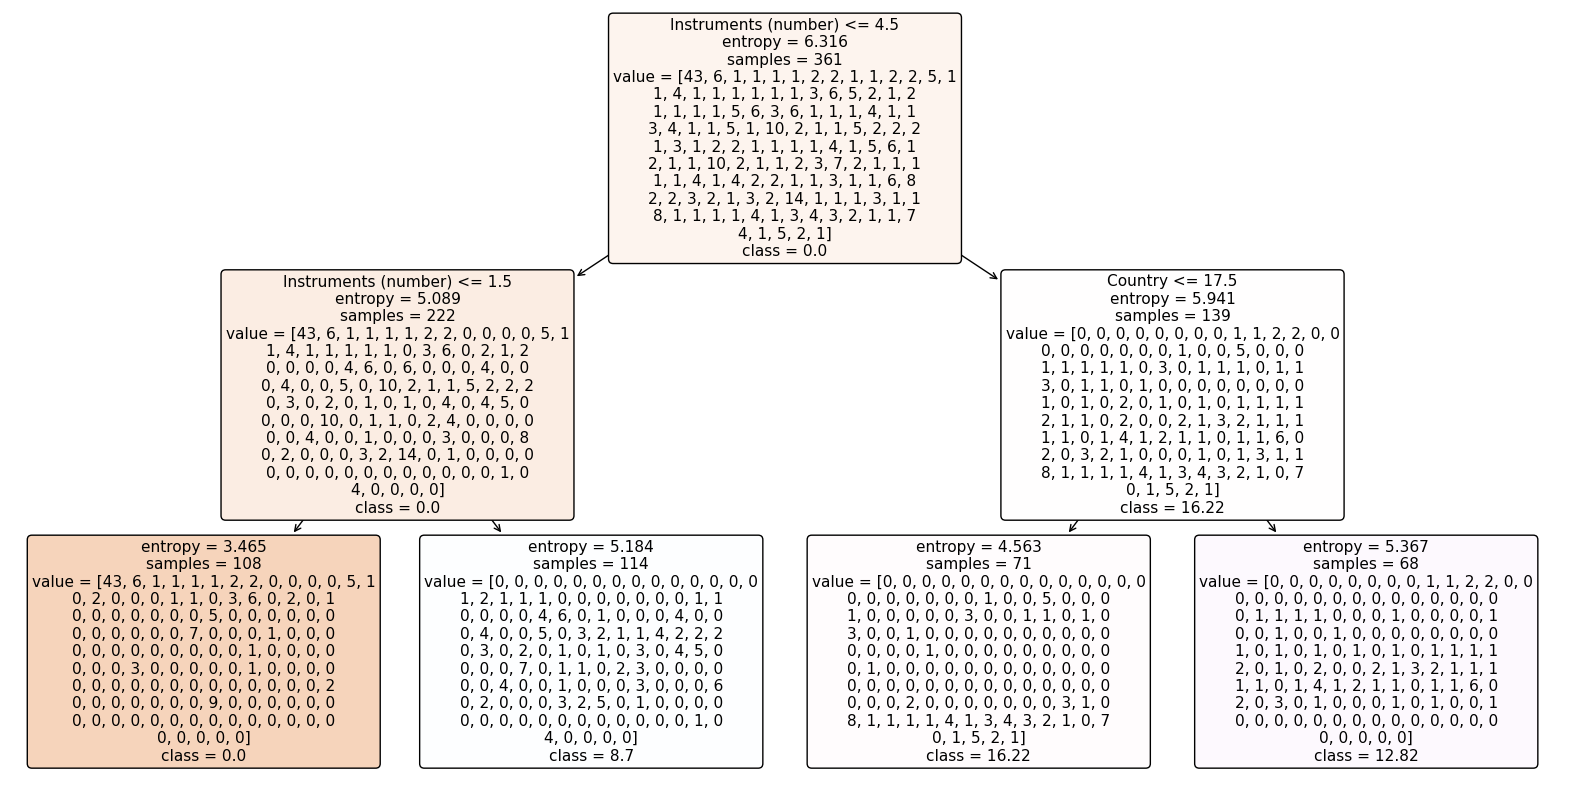

In [50]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.preprocessing import LabelEncoder


trees = pd.read_csv("/Users/kendallgilbert/dsan-5000-project-kendallgilbert180/dsan-website/5000-website/data/01-modified-data/nb_record.csv")
trees.head
label_encoder = LabelEncoder()
trees['Country'] = label_encoder.fit_transform(trees['Country'])
trees['Value'] = label_encoder.fit_transform(trees['Value'])


y = trees['Value']
bin_edges = [0, 18, 36, 54, 72, 87]
y_binned = pd.cut(y, bins=bin_edges, labels=False, include_lowest=True)

# X is all features besides Value
X = trees.drop(['Value'], axis=1)


# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=2)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Create a figure and set its size
plt.figure(figsize=(20, 10))

# Plot the decision tree
plot_tree(clf, feature_names=X.columns.tolist(), class_names=[str(label) for label in label_encoder.classes_], filled=True, rounded=True)

# Show the plot
plt.show()
